    testing the article preprocessor

In [1]:
import pandas as pd
import json
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import spacy
nlp = spacy.load("en_core_web_sm")


In [2]:
doc = r"https://docs.google.com/spreadsheets/d/19gFONrR0d4Ed57gGWtUqVHjjvw85WgysCh9ukhiTmBM/export?format=csv"

In [3]:
#url = "https://docs.google.com/spreadsheets/d/19gFONrR0d4Ed57gGWtUqVHjjvw85WgysCh9ukhiTmBM/export?format=csv"
df = pd.read_csv(doc)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            200 non-null    object
 1   Title           201 non-null    object
 2   URL             201 non-null    object
 3   Publication     201 non-null    object
 4   Author          201 non-null    object
 5   Stance          201 non-null    object
 6   Topic_Category  201 non-null    object
 7   Content         201 non-null    object
dtypes: object(8)
memory usage: 12.7+ KB


In [5]:
def clean_text_spacy(text):
    if not text:
        return []
    doc = nlp(text.lower())
    return [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

In [ ]:
#sv_path = "articles_4_24_25.csv"  # update this
df = pd.read_csv("articles_4_24_25.csv").drop(columns=['Topic_Category'])
df = df.dropna(subset=["Stance", "Content", "URL"])
# Drop any nulls in essential fields

# Optional: deduplicate based on URL
df = df.drop_duplicates(subset=["URL"])
df.head()

,Date,Title,URL,Publication,Author,Stance,Content
0,4/11/2025,Mapping Attacks on LGBTQ Rights in U.S. State ...,https://www.aclu.org/legislative-attacks-on-lg...,ACLU,None listed,Pro,No text content
1,4/3/25,The Human Toll of Trump's Anti-Trans Crusade,https://www.aclu.org/news/lgbtq-rights/the-hum...,ACLU,Lisa Francois,Pro,President Donald Trump’s assault on transgende...
2,4/3/25,Perkins et al. v. State (HB 121),https://www.aclu.org/cases/perkins-et-al-v-state,ACLU,None listed,Pro,"HB 121, which took effect on March 27, 2025, i..."
3,2/11/2025,Montana Senate endorses bill tying bathrooms t...,https://www.kpax.com/news/montana-senate-endor...,KPAX (local news),Jonathon Ambarian,Anti,A bill that would require transgender people i...
4,3/26/25,Library Patrons Sue Greenville County Over Wid...,https://www.aclu.org/press-releases/library-pa...,ACLU,None listed,Pro,"GREENVILLE, S.C. – Local library patrons, with..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         188 non-null    object
 1   Title        189 non-null    object
 2   URL          189 non-null    object
 3   Publication  189 non-null    object
 4   Author       189 non-null    object
 5   Stance       189 non-null    object
 6   Content      189 non-null    object
dtypes: object(7)
memory usage: 10.5+ KB


In [8]:
output = []
import uuid

for _, row in df.iterrows():
    item = {
        "id": str(uuid.uuid4()),  # add a random unique id,
        #"topic_id": int(float(row["Topic_Category"])) if pd.notna(row["Topic_Category"]) else -1,
        "stance": row["Stance"].strip().lower(),
        "title": row["Title"].strip().lower(),
        "title_tokens" : clean_text_spacy(row['Title']),
        "source": row["Publication"].strip().lower(),
        "author": row["Author"].strip().lower(),
        "url": row["URL"],
        "date": row["Date"],
        "text": row["Content"].strip().lower(),
        "tokens": clean_text_spacy(row["Content"]),
        "embedding": None
    }
    output.append(item)

In [10]:
output

[{'id': '6a95dcbf-5a80-4c2a-ad04-d05ef8583abb',
  'stance': 'pro',
  'title': 'mapping attacks on lgbtq rights in u.s. state legislatures in 2025',
  'title_tokens': ['mapping',
   'attack',
   'lgbtq',
   'right',
   'state',
   'legislature'],
  'source': 'aclu',
  'author': 'none listed',
  'url': 'https://www.aclu.org/legislative-attacks-on-lgbtq-rights-2025',
  'date': '4/11/2025',
  'text': 'no text content',
  'tokens': ['text', 'content'],
  'embedding': None},
 {'id': 'f9573eca-5368-4c7f-946c-fc281cfca533',
  'stance': 'pro',
  'title': "the human toll of trump's anti-trans crusade",
  'title_tokens': ['human', 'toll', 'trump', 'anti', 'trans', 'crusade'],
  'source': 'aclu',
  'author': 'lisa francois',
  'url': 'https://www.aclu.org/news/lgbtq-rights/the-human-toll-of-trumps-anti-trans-crusade',
  'date': '4/3/25',
  'text': 'president donald trump’s assault on transgender rights is a gross overreach of presidential power and yet another attempt to punish trans people just f

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# metrics functions
def get_stance_distribution(df):
    return df["stance"].value_counts()

def get_token_lengths(df):
    return df["tokens"].apply(len)

def get_title_token_lengths(df):
    return df["title_tokens"].apply(len)

# dashboard function
def plot_full_dashboard(df):
    sns.set_theme(style="whitegrid")

    # calculate metrics
    stance_counts = get_stance_distribution(df)
    token_lengths = get_token_lengths(df)
    title_token_lengths = get_title_token_lengths(df)

    # set up plot grid
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle("Dataset Metrics Dashboard", fontsize=20)

    # stance distribution
    sns.barplot(x=stance_counts.index, y=stance_counts.values, ax=axs[0])
    axs[0].set_title("Stance Distribution", fontsize=14)
    axs[0].set_ylabel("Count")
    axs[0].set_xlabel("Stance")

    # article token lengths
    sns.histplot(token_lengths, bins=20, kde=True, ax=axs[1])
    axs[1].set_title("Article Token Lengths", fontsize=14)
    axs[1].set_xlabel("Number of Tokens")
    axs[1].set_ylabel("Number of Articles")

    # title token lengths
    sns.histplot(title_token_lengths, bins=15, kde=True, ax=axs[2])
    axs[2].set_title("Title Token Lengths", fontsize=14)
    axs[2].set_xlabel("Number of Tokens in Title")
    axs[2].set_ylabel("Number of Titles")

    plt.tight_layout(pad=2)
    plt.show()

In [10]:
df = pd.DataFrame(output)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            189 non-null    object
 1   stance        189 non-null    object
 2   title         189 non-null    object
 3   title_tokens  189 non-null    object
 4   source        189 non-null    object
 5   author        189 non-null    object
 6   url           189 non-null    object
 7   date          188 non-null    object
 8   text          189 non-null    object
 9   tokens        189 non-null    object
 10  embedding     0 non-null      object
dtypes: object(11)
memory usage: 16.4+ KB


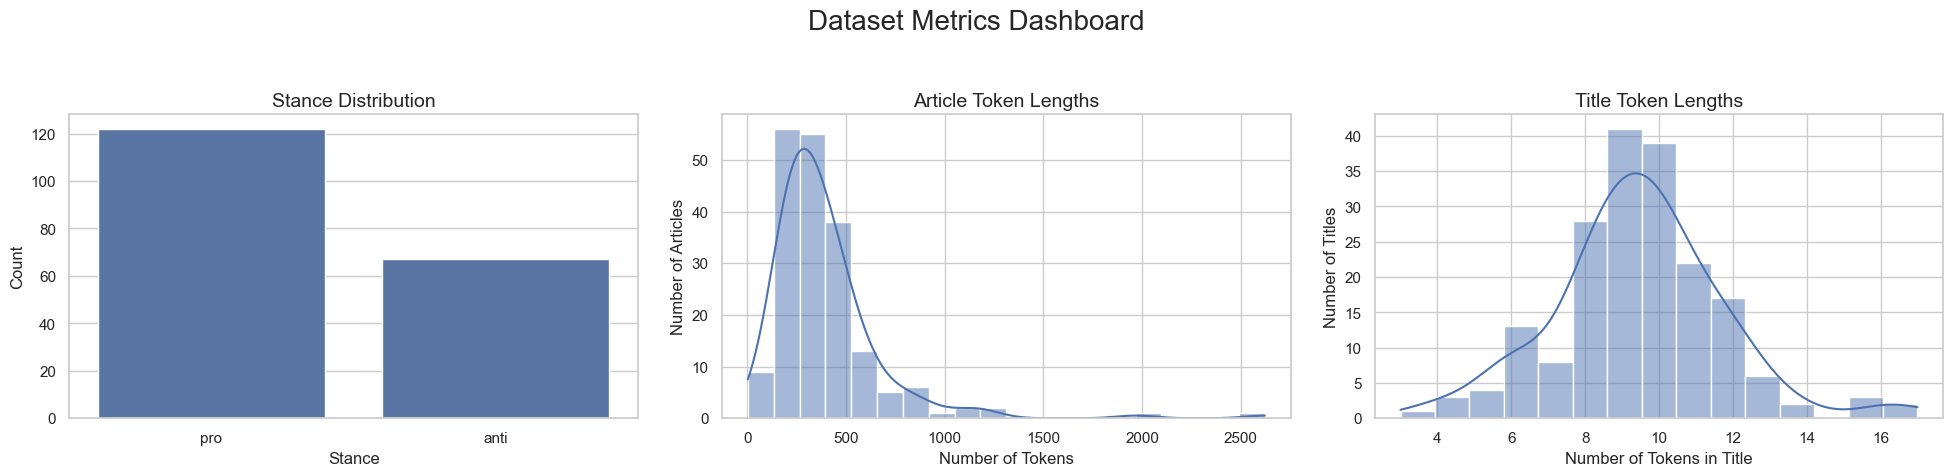

In [12]:
plot_full_dashboard(df)

In [ ]:
# from sentence_transformers import SentenceTransformer
# import numpy as np

# # load model
# model = SentenceTransformer('all-MiniLM-L6-v2')

# def generate_embeddings(df, model):
#     texts = df['text'].tolist()
#     titles = df['title'].tolist()

#     text_embeddings = model.encode(texts, show_progress_bar=True, convert_to_numpy=True)
#     title_embeddings = model.encode(titles, show_progress_bar=True, convert_to_numpy=True)

#     return text_embeddings, title_embeddings

# # usage
# text_embeddings, title_embeddings = generate_embeddings(df, model)

# # store back into your dataframe
# df["text_embedding"] = list(text_embeddings)
# df["title_embedding"] = list(title_embeddings)

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

Batches:   0%|          | 0/6 [00:00<?, ?it/s]

In [15]:
df

,id,stance,title,title_tokens,source,author,url,date,text,tokens,embedding,text_embedding,title_embedding
0,ce21d432-fc7b-4d3f-b323-99fd92c8e668,pro,mapping attacks on lgbtq rights in u.s. state ...,"[mapping, attack, lgbtq, right, state, legisla...",aclu,none listed,https://www.aclu.org/legislative-attacks-on-lg...,4/11/2025,no text content,"[text, content]",None,"[0.08752789, 0.020743428, -0.03189608, 0.01232...","[0.046585113, -0.005804433, 0.03815142, 0.0829..."
1,a7704349-1fc2-405c-9ddd-0631d8d62399,pro,the human toll of trump's anti-trans crusade,"[human, toll, trump, anti, trans, crusade]",aclu,lisa francois,https://www.aclu.org/news/lgbtq-rights/the-hum...,4/3/25,president donald trump’s assault on transgende...,"[president, donald, trump, assault, transgende...",None,"[-0.071229674, 0.11960086, -8.112944e-06, -0.0...","[0.0026350021, 0.07455511, 0.05679145, 0.00743..."
2,fc7a0563-ba50-41fe-bc5f-2c53699dc4ab,pro,perkins et al. v. state (hb 121),"[perkin, et, al, state, hb]",aclu,none listed,https://www.aclu.org/cases/perkins-et-al-v-state,4/3/25,"hb 121, which took effect on march 27, 2025, i...","[hb, take, effect, march, draconian, law, sing...",None,"[-0.109763004, 0.07314424, -0.011282526, -0.02...","[-0.074171565, 0.05157274, -0.002022174, 0.011..."
3,be717cb9-8a8c-4f7f-b5a1-a7ed388cb4f8,anti,montana senate endorses bill tying bathrooms t...,"[montana, senate, endorse, bill, tie, bathroom...",kpax (local news),jonathon ambarian,https://www.kpax.com/news/montana-senate-endor...,2/11/2025,a bill that would require transgender people i...,"[bill, require, transgend, people, montana, us...",None,"[-0.069546804, 0.0703037, 0.0033689993, -0.022...","[-0.021900332, 0.051923636, -0.0007390089, -0...."
4,87d81756-42cf-4650-9793-fa0233811668,pro,library patrons sue greenville county over wid...,"[library, patron, sue, greenville, county, wid...",aclu,none listed,https://www.aclu.org/press-releases/library-pa...,3/26/25,"greenville, s.c. – local library patrons, with...","[greenville, local, library, patron, help, ame...",None,"[-0.057522457, 0.019018497, -0.10514608, 0.062...","[-0.009151903, 0.034411147, -0.042043395, 0.05..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0f51bcdd-7d71-4d85-a7ae-1be47e20531f,anti,elon musk ‘vowed to destroy the woke mind viru...,"[elon, musk, vow, destroy, woke, mind, virus, ...",daily wire,zach jewell,https://www.dailywire.com/news/elon-musk-vowed...,12/31/2024,"as we prepare to enter the new year, we’re tak...","[prepare, enter, new, year, take, daily, wire,...",None,"[-0.051359944, 0.12021645, 0.004133241, 0.0538...","[-0.009912209, 0.07807592, 0.06407301, -0.0323..."
185,0fbfb288-6d9c-457d-ba30-9bc14c842a15,anti,virginia judge greenlights case on school’s tr...,"[virginia, judge, greenlights, case, school, t...",daily wire,luke rosiak,https://www.dailywire.com/news/virginia-judge-...,12/7/2024,"fairfax, virginia — a state judge on friday re...","[fairfax, virginia, state, judge, friday, reje...",None,"[0.025198165, 0.122266315, -0.02589192, -0.014...","[0.020177525, 0.10371799, 0.035562024, -0.0455..."
186,d8ccb9b9-098b-4dbe-94f3-b4513824f2fe,anti,the supreme court is about to hear a major chi...,"[supreme, court, hear, major, child, gender, t...",daily wire,mary margaret olohan,https://www.dailywire.com/news/the-supreme-cou...,12/1/2024,the supreme court on december 4 will hear oral...,"[supreme, court, december, hear, oral, argumen...",None,"[-0.11788845, 0.07297101, -0.018800367, -0.003...","[-0.015024182, 0.022776663, -0.014130071, 0.03..."
187,5bf42b9e-efed-4ee8-b2bd-0a6823f56f67,anti,‘nyt — you stink!’: paper blasted for reducing...,"[nyt, stink, paper, blast, reduce, biological,...",daily wire,virginia kruta,https://www.dailywire.com/news/nyt-you-stink-p...,11/29/2024,the new york times faced a wave of backlash fo...,"[new, york, times, face, wave, backlash, story...",None,"[0.012502258, 0.052861314, -0.034672335, -0.01...","[-0.0069597284, 0.009355776, 0.020218698

In [16]:
import json

def save_df_to_json(df, output_path):
    export_data = []

    for _, row in df.iterrows():
        entry = {
            "id": row["id"],
            "stance": row["stance"],
            "title": row["title"],
            "title_tokens": row["title_tokens"],
            "source": row["source"],
            "author": row["author"],
            "url": row["url"],
            "date": row["date"],
            "text": row["text"],
            "tokens": row["tokens"],
            "text_embedding": row["text_embedding"].tolist() if isinstance(row["text_embedding"], np.ndarray) else row["text_embedding"],
            "title_embedding": row["title_embedding"].tolist() if isinstance(row["title_embedding"], np.ndarray) else row["title_embedding"]
        }
        export_data.append(entry)

    with open(output_path, "w") as f:
        json.dump(export_data, f, indent=2)

    print(f"[✓] Saved {len(export_data)} articles to {output_path}")

# usage
save_df_to_json(df, "cleaned_articles_with_embeddings.json")

[✓] Saved 189 articles to cleaned_articles_with_embeddings.json


In [17]:
import chromadb
from chromadb.utils import embedding_functions

# initialize chroma client
chroma_client = chromadb.Client()

# create or get collection
collection = chroma_client.get_or_create_collection(name="lgbtq_articles")

# example: insert documents
def load_embeddings_into_chroma(df, collection):
    for idx, row in df.iterrows():
        collection.add(
            documents=[row["text"]],
            metadatas=[{
                "id": row["id"],
                "stance": row["stance"],
                "source": row["source"],
                "author": row["author"],
                "date": row["date"],
                "url": row["url"],
                "title": row["title"]
            }],
            ids=[row["id"]],
            embeddings=[row["text_embedding"]]
        )
    print(f"[✓] Loaded {len(df)} articles into Chroma collection")

# usage
load_embeddings_into_chroma(df, collection)

[✓] Loaded 189 articles into Chroma collection


In [18]:
df.stance.value_counts()

stance
pro     122
anti     67
Name: count, dtype: int64

In [19]:
import random

i = random.randint(1, df.shape[0])
results = collection.query(
    query_embeddings=[df.iloc[i]["text_embedding"]],
    n_results=5
)
print(f"Finding similar articles to: {df.iloc[i]["title"]}")
for doc, meta in zip(results['documents'][0], results['metadatas'][0]):
    print("Found article:", meta["title"])
    print("Source:", meta["source"])
    print("---")

Finding similar articles to: hospitals across u.s. stop transitioning children after trump signs order protecting kids
Found article: hospitals across u.s. stop transitioning children after trump signs order protecting kids
Source: daily wire
---
Found article: trump signs executive order protecting kids from irreversible gender transition procedures
Source: daily wire
---
Found article: the human toll of trump's anti-trans crusade
Source: aclu
---
Found article: trump calls for congress to pass bill to end the ‘sexual mutilation’ of kids
Source: daily wire
---
Found article: report: some lgbtq+ people stockpile trans drugs, make plans to move after trump win
Source: breitbart
---


In [ ]:
# import torch
# from torch.utils.data import Dataset
# import random

# class TripletArticleDataset(Dataset):
#     def __init__(self, df, tokenizer, max_length=512):
#         self.df = df.reset_index(drop=True)
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#         # split pools
#         self.pro_df = self.df[self.df["stance"] == "pro"].reset_index(drop=True)
#         self.anti_df = self.df[self.df["stance"] == "anti"].reset_index(drop=True)

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         anchor_row = self.df.iloc[idx]
#         anchor_text = anchor_row["text"]
#         anchor_stance = anchor_row["stance"]

#         # positive sampling (same stance)
#         if anchor_stance == "pro":
#             positive_row = self.pro_df.sample(1).iloc[0]
#         else:
#             positive_row = self.anti_df.sample(1).iloc[0]

#         # negative sampling (opposite stance)
#         # oversample minority class deliberately
#         if anchor_stance == "pro":
#             negative_row = self.anti_df.sample(1, replace=True).iloc[0]
#         else:
#             negative_row = self.pro_df.sample(1, replace=True).iloc[0]

#         positive_text = positive_row["text"]
#         negative_text = negative_row["text"]

#         # tokenize all three
#         anchor = self.tokenizer(anchor_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
#         positive = self.tokenizer(positive_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
#         negative = self.tokenizer(negative_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")

#         return {
#             "anchor_input_ids": anchor["input_ids"].squeeze(0),
#             "anchor_attention_mask": anchor["attention_mask"].squeeze(0),
#             "positive_input_ids": positive["input_ids"].squeeze(0),
#             "positive_attention_mask": positive["attention_mask"].squeeze(0),
#             "negative_input_ids": negative["input_ids"].squeeze(0),
#             "negative_attention_mask": negative["attention_mask"].squeeze(0)
#         }

In [ ]:
# import torch.nn as nn
# from transformers import AutoModel

# class TripletEncoder(nn.Module):
#     def __init__(self, model_name="distilbert-base-uncased", embedding_dim=64):
#         super().__init__()
#         self.encoder = AutoModel.from_pretrained(model_name)
#         self.projection = nn.Sequential(
#             nn.Linear(self.encoder.config.hidden_size, embedding_dim),
#             nn.Dropout(0.3)
#         )

#     def forward(self, input_ids, attention_mask):
#         outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
#         cls_output = outputs.last_hidden_state[:, 0]  # use [CLS] token
#         embedding = self.projection(cls_output)
#         embedding = nn.functional.normalize(embedding, p=2, dim=1)  # L2 normalize
#         return embedding

In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F
# from torch.utils.data import DataLoader
# from transformers import AutoTokenizer, AutoModel

# # 1. DEVICE SETUP
# device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
# print(f"Using device: {device}")

# # 2. DATASET
# class TripletArticleDataset(torch.utils.data.Dataset):
#     def __init__(self, df, tokenizer, max_length=512):
#         self.df = df.reset_index(drop=True)
#         self.tokenizer = tokenizer
#         self.max_length = max_length

#         # split by stance
#         self.pro_df = self.df[self.df["stance"] == "pro"].reset_index(drop=True)
#         self.anti_df = self.df[self.df["stance"] == "anti"].reset_index(drop=True)

#     def __len__(self):
#         return len(self.df)

#     def __getitem__(self, idx):
#         anchor_row = self.df.iloc[idx]
#         anchor_text = anchor_row["text"]
#         anchor_stance = anchor_row["stance"]

#         # positive sample
#         if anchor_stance == "pro":
#             positive_row = self.pro_df.sample(1).iloc[0]
#         else:
#             positive_row = self.anti_df.sample(1).iloc[0]

#         # negative sample (oversample minority)
#         if anchor_stance == "pro":
#             negative_row = self.anti_df.sample(1, replace=True).iloc[0]
#         else:
#             negative_row = self.pro_df.sample(1, replace=True).iloc[0]

#         positive_text = positive_row["text"]
#         negative_text = negative_row["text"]

#         # tokenize
#         anchor = self.tokenizer(anchor_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
#         positive = self.tokenizer(positive_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
#         negative = self.tokenizer(negative_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")

#         return {
#             "anchor_input_ids": anchor["input_ids"].squeeze(0),
#             "anchor_attention_mask": anchor["attention_mask"].squeeze(0),
#             "positive_input_ids": positive["input_ids"].squeeze(0),
#             "positive_attention_mask": positive["attention_mask"].squeeze(0),
#             "negative_input_ids": negative["input_ids"].squeeze(0),
#             "negative_attention_mask": negative["attention_mask"].squeeze(0)
#         }

# # 3. MODEL
# class TripletEncoder(nn.Module):
#     def __init__(self, model_name="distilbert-base-uncased", embedding_dim=64):
#         super().__init__()
#         self.encoder = AutoModel.from_pretrained(model_name)
#         self.projection = nn.Sequential(
#             nn.Linear(self.encoder.config.hidden_size, embedding_dim),
#             nn.Dropout(0.3)
#         )

#     def forward(self, input_ids, attention_mask):
#         outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
#         cls_output = outputs.last_hidden_state[:, 0]
#         embedding = self.projection(cls_output)
#         embedding = F.normalize(embedding, p=2, dim=1)  # normalize to unit sphere
#         return embedding

# # 4. TRAINING SETUP
# tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
# dataset = TripletArticleDataset(df, tokenizer)
# loader = DataLoader(dataset, batch_size=8, shuffle=True)  # smaller batch size for MPS

# model = TripletEncoder()
# model = model.to(device)

# optimizer = optim.AdamW(model.parameters(), lr=2e-5)
# criterion = nn.TripletMarginLoss(margin=1.0, p=2)

# # 5. TRAINING LOOP
# epochs = 15
# for epoch in range(epochs):
#     model.train()
#     total_loss = 0

#     for batch in loader:
#         anchor_ids = batch["anchor_input_ids"].to(device)
#         anchor_mask = batch["anchor_attention_mask"].to(device)
#         positive_ids = batch["positive_input_ids"].to(device)
#         positive_mask = batch["positive_attention_mask"].to(device)
#         negative_ids = batch["negative_input_ids"].to(device)
#         negative_mask = batch["negative_attention_mask"].to(device)

#         anchor_emb = model(anchor_ids, anchor_mask)
#         positive_emb = model(positive_ids, positive_mask)
#         negative_emb = model(negative_ids, negative_mask)

#         loss = criterion(anchor_emb, positive_emb, negative_emb)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#     print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(loader):.4f}")

# # 6. SAVE MODEL
# torch.save(model.state_dict(), "triplet_encoder_mps.pth")

Using device: mps
Epoch 1/15 | Loss: 1.0078


In [13]:
# 0. SETUP
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# device
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print(f"Using device: {device}")

# 1. DATASET
class TripletArticleDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_length=256):
        self.df = df.reset_index(drop=True)
        self.tokenizer = tokenizer
        self.max_length = max_length

        self.pro_df = self.df[self.df["stance"] == "pro"].reset_index(drop=True)
        self.anti_df = self.df[self.df["stance"] == "anti"].reset_index(drop=True)

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        anchor_row = self.df.iloc[idx]
        anchor_text = anchor_row["text"]
        anchor_stance = anchor_row["stance"]

        # Positive sample
        if anchor_stance == "pro":
            positive_row = self.pro_df.sample(1).iloc[0]
        else:
            positive_row = self.anti_df.sample(1).iloc[0]

        # Negative sample
        if anchor_stance == "pro":
            negative_row = self.anti_df.sample(1, replace=True).iloc[0]
        else:
            negative_row = self.pro_df.sample(1, replace=True).iloc[0]

        positive_text = positive_row["text"]
        negative_text = negative_row["text"]

        # Tokenize
        anchor = self.tokenizer(anchor_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
        positive = self.tokenizer(positive_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")
        negative = self.tokenizer(negative_text, padding="max_length", truncation=True, max_length=self.max_length, return_tensors="pt")

        return {
            "anchor_input_ids": anchor["input_ids"].squeeze(0),
            "anchor_attention_mask": anchor["attention_mask"].squeeze(0),
            "positive_input_ids": positive["input_ids"].squeeze(0),
            "positive_attention_mask": positive["positive_attention_mask"].squeeze(0),
            "negative_input_ids": negative["input_ids"].squeeze(0),
            "negative_attention_mask": negative["negative_attention_mask"].squeeze(0)
        }

# 2. MODEL
class TripletEncoder(nn.Module):
    def __init__(self, model_name="prajjwal1/bert-tiny", embedding_dim=64):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.projection = nn.Sequential(
            nn.Linear(self.encoder.config.hidden_size, embedding_dim),
            nn.Dropout(0.3)
        )

    def forward(self, input_ids, attention_mask):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs.last_hidden_state[:, 0]
        embedding = self.projection(cls_output)
        embedding = F.normalize(embedding, p=2, dim=1)  # normalize to unit sphere
        return embedding

# 3. TRAINING SETUP
# replace 'df' below with your actual DataFrame
tokenizer = AutoTokenizer.from_pretrained("prajjwal1/bert-tiny")
dataset = TripletArticleDataset(df, tokenizer)
loader = DataLoader(dataset, batch_size=8, shuffle=True)

model = TripletEncoder()
model = model.to(device)

optimizer = optim.AdamW(model.parameters(), lr=2e-5)
criterion = nn.TripletMarginLoss(margin=1.0, p=2)

# 4. TRAINING LOOP
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss = 0

    print(f"Epoch {epoch+1}/{epochs}")

    for batch in tqdm(loader, desc=f"Training Epoch {epoch+1}"):
        anchor_ids = batch["anchor_input_ids"].to(device)
        anchor_mask = batch["anchor_attention_mask"].to(device)
        positive_ids = batch["positive_input_ids"].to(device)
        positive_mask = batch["positive_attention_mask"].to(device)
        negative_ids = batch["negative_input_ids"].to(device)
        negative_mask = batch["negative_attention_mask"].to(device)

        anchor_emb = model(anchor_ids, anchor_mask)
        positive_emb = model(positive_ids, positive_mask)
        negative_emb = model(negative_ids, negative_mask)

        loss = criterion(anchor_emb, positive_emb, negative_emb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1} | Avg Loss: {total_loss/len(loader):.4f}")

# 5. SAVE MODEL
torch.save(model.state_dict(), "triplet_encoder_mps_safe.pth")
print("[✓] Model saved to triplet_encoder_mps_safe.pth")

Using device: mps


pytorch_model.bin:   0%|          | 0.00/17.8M [00:00<?, ?B/s]

Epoch 1/20


Training Epoch 1:   0%|          | 0/24 [00:00<?, ?it/s]


KeyError: 'positive_attention_mask'

model.safetensors:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

In [14]:
import pandas as pd
import numpy as np
import uuid
import json
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import chromadb
from chromadb.utils import embedding_functions
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
from tqdm import tqdm

# 0. CONFIG
CSV_PATH = "articles_4_24_25.csv"  # adjust as needed
SPACY_MODEL = "en_core_web_sm"
TRIPLET_MODEL = "prajjwal1/bert-tiny"
EMBED_DIM = 64
BATCH_SIZE = 8
EPOCHS = 20
DEVICE = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# 1. LOAD & CLEAN RAW DATA
df_raw = pd.read_csv(CSV_PATH)
df_raw = df_raw.drop(columns=["Topic_Category"], errors="ignore")
df_raw = df_raw.dropna(subset=["Stance", "Content", "URL"]).drop_duplicates(subset=["URL"]).reset_index(drop=True)

# 2. TEXT CLEANING WITH spaCy
nlp = spacy.load(SPACY_MODEL)
def clean_text_spacy(text: str):
    if not isinstance(text, str) or not text.strip():
        return []
    doc = nlp(text.lower())
    return [tok.lemma_ for tok in doc if tok.is_alpha and not tok.is_stop]

# 3. BUILD CLEANED DATAFRAME
records = []
for _, row in df_raw.iterrows():
    title = row.get("Title", "")
    content = row["Content"]
    records.append({
        "id": uuid.uuid4().hex,
        "stance": row["Stance"].strip().lower(),
        "title": title.strip().lower(),
        "title_tokens": clean_text_spacy(title),
        "source": row.get("Publication", "").strip().lower(),
        "author": row.get("Author", "").strip().lower(),
        "url": row["URL"],
        "date": row.get("Date", ""),
        "text": content.strip().lower(),
        "tokens": clean_text_spacy(content),
        "text_embedding": None,   # placeholder for later
        "title_embedding": None   # placeholder for later
    })
df = pd.DataFrame(records)
df.info()

# 4. DASHBOARD
def plot_full_dashboard(df):
    sns.set_theme(style="whitegrid")
    stance_counts = df["stance"].value_counts()
    tok_lens = df["tokens"].apply(len)
    title_lens = df["title_tokens"].apply(len)

    fig, axs = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle("Dataset Metrics Dashboard", fontsize=20)

    sns.barplot(x=stance_counts.index, y=stance_counts.values, ax=axs[0])
    axs[0].set(title="Stance Distribution", xlabel="Stance", ylabel="Count")

    sns.histplot(tok_lens, bins=20, kde=True, ax=axs[1])
    axs[1].set(title="Article Token Lengths", xlabel="Tokens", ylabel="Articles")

    sns.histplot(title_lens, bins=15, kde=True, ax=axs[2])
    axs[2].set(title="Title Token Lengths", xlabel="Tokens in Title", ylabel="Titles")

    plt.tight_layout(pad=2)
    plt.show()

# Usage: plot_full_dashboard(df)

# 5. SAVE TO JSON
def save_df_to_json(df, output_path):
    export = []
    for _, r in df.iterrows():
        export.append({
            "id": r["id"],
            "stance": r["stance"],
            "title": r["title"],
            "title_tokens": r["title_tokens"],
            "source": r["source"],
            "author": r["author"],
            "url": r["url"],
            "date": r["date"],
            "text": r["text"],
            "tokens": r["tokens"],
            "text_embedding": (r["text_embedding"].tolist()
                               if isinstance(r["text_embedding"], np.ndarray)
                               else r["text_embedding"]),
            "title_embedding": (r["title_embedding"].tolist()
                                if isinstance(r["title_embedding"], np.ndarray)
                                else r["title_embedding"])
        })
    with open(output_path, "w") as f:
        json.dump(export, f, indent=2)
    print(f"[✓] Saved {len(export)} articles to {output_path}")

# Usage: save_df_to_json(df, "cleaned_articles_with_embeddings.json")

# 6. CHROMADB LOADING
chroma_client = chromadb.Client()
collection = chroma_client.get_or_create_collection(name="lgbtq_articles")

def load_embeddings_into_chroma(df, collection):
    for _, r in df.iterrows():
        collection.add(
            documents=[r["text"]],
            metadatas=[{
                "id": r["id"],
                "stance": r["stance"],
                "source": r["source"],
                "author": r["author"],
                "date": r["date"],
                "url": r["url"],
                "title": r["title"]
            }],
            ids=[r["id"]],
            embeddings=[r["text_embedding"]]
        )
    print(f"[✓] Loaded {len(df)} articles into Chroma")

# Usage: load_embeddings_into_chroma(df, collection)

# 7. TRIPLET DATASET + MODEL
tokenizer = AutoTokenizer.from_pretrained(TRIPLET_MODEL)

class TripletArticleDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=256):
        self.df = df.reset_index(drop=True)
        self.tok = tokenizer
        self.max_len = max_len
        self.pro = self.df[self.df.stance=="pro"]
        self.anti = self.df[self.df.stance=="anti"]

    def __len__(self):
        return len(self.df)

    def __getitem__(self, i):
        row = self.df.iloc[i]
        anchor_text, stance = row.text, row.stance

        pos_row = (self.pro.sample(1).iloc[0]
                   if stance=="pro" else self.anti.sample(1).iloc[0])
        neg_row = (self.anti.sample(1, replace=True).iloc[0]
                   if stance=="pro" else self.pro.sample(1, replace=True).iloc[0])

        def to_tensors(text):
            out = self.tok(
                text, 
                padding="max_length", 
                truncation=True, 
                max_length=self.max_len, 
                return_tensors="pt"
            )
            return out.input_ids.squeeze(0), out.attention_mask.squeeze(0)

        a_ids, a_mask = to_tensors(anchor_text)
        p_ids, p_mask = to_tensors(pos_row.text)
        n_ids, n_mask = to_tensors(neg_row.text)

        return {
            "anchor_input_ids": a_ids,
            "anchor_attention_mask": a_mask,
            "positive_input_ids": p_ids,
            "positive_attention_mask": p_mask,
            "negative_input_ids": n_ids,
            "negative_attention_mask": n_mask
        }

class TripletEncoder(nn.Module):
    def __init__(self, model_name=TRIPLET_MODEL, emb_dim=EMBED_DIM):
        super().__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        self.proj = nn.Sequential(
            nn.Linear(self.encoder.config.hidden_size, emb_dim),
            nn.Dropout(0.3)
        )
    def forward(self, ids, mask):
        out = self.encoder(ids, attention_mask=mask).last_hidden_state[:,0]
        emb = self.proj(out)
        return F.normalize(emb, p=2, dim=1)

# Prepare data + training
dataset = TripletArticleDataset(df, tokenizer)
loader  = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
model   = TripletEncoder().to(DEVICE)
opt     = optim.AdamW(model.parameters(), lr=2e-5)
crit    = nn.TripletMarginLoss(margin=1.0, p=2)

for ep in range(EPOCHS):
    model.train()
    total = 0
    print(f"Epoch {ep+1}/{EPOCHS}")
    for batch in tqdm(loader, desc="Training"):
        a, am = batch["anchor_input_ids"].to(DEVICE), batch["anchor_attention_mask"].to(DEVICE)
        p, pm = batch["positive_input_ids"].to(DEVICE), batch["positive_attention_mask"].to(DEVICE)
        n, nm = batch["negative_input_ids"].to(DEVICE), batch["negative_attention_mask"].to(DEVICE)

        anc = model(a, am)
        pos = model(p, pm)
        neg = model(n, nm)

        loss = crit(anc, pos, neg)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total += loss.item()

    print(f" → Avg Loss: {total/len(loader):.4f}")

# 8. SAVE MODEL
torch.save(model.state_dict(), "triplet_encoder.pth")
print("[✓] Model saved")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               189 non-null    object
 1   stance           189 non-null    object
 2   title            189 non-null    object
 3   title_tokens     189 non-null    object
 4   source           189 non-null    object
 5   author           189 non-null    object
 6   url              189 non-null    object
 7   date             188 non-null    object
 8   text             189 non-null    object
 9   tokens           189 non-null    object
 10  text_embedding   0 non-null      object
 11  title_embedding  0 non-null      object
dtypes: object(12)
memory usage: 17.8+ KB
Epoch 1/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.13it/s]


 → Avg Loss: 0.9982
Epoch 2/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.39it/s]


 → Avg Loss: 0.9907
Epoch 3/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.39it/s]


 → Avg Loss: 1.0144
Epoch 4/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.17it/s]


 → Avg Loss: 0.9778
Epoch 5/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.20it/s]


 → Avg Loss: 1.0171
Epoch 6/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.46it/s]


 → Avg Loss: 0.9963
Epoch 7/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.46it/s]


 → Avg Loss: 0.9744
Epoch 8/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.30it/s]


 → Avg Loss: 0.9814
Epoch 9/20


Training: 100%|██████████| 24/24 [00:01<00:00, 12.44it/s]


 → Avg Loss: 0.9874
Epoch 10/20


Training: 100%|██████████| 24/24 [00:02<00:00, 11.88it/s]


 → Avg Loss: 0.9828
Epoch 11/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.43it/s]


 → Avg Loss: 0.9790
Epoch 12/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s]


 → Avg Loss: 0.9539
Epoch 13/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.10it/s]


 → Avg Loss: 0.9669
Epoch 14/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.06it/s]


 → Avg Loss: 0.9533
Epoch 15/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s]


 → Avg Loss: 0.9387
Epoch 16/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.10it/s]


 → Avg Loss: 0.9074
Epoch 17/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s]


 → Avg Loss: 0.9016
Epoch 18/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.07it/s]


 → Avg Loss: 0.8722
Epoch 19/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.06it/s]


 → Avg Loss: 0.8574
Epoch 20/20


Training: 100%|██████████| 24/24 [00:03<00:00,  7.12it/s]

 → Avg Loss: 0.7892
[✓] Model saved


In [15]:
df

,id,stance,title,title_tokens,source,author,url,date,text,tokens,text_embedding,title_embedding
0,ebb23fac69f048b58e0bfa1e14814f6c,pro,mapping attacks on lgbtq rights in u.s. state ...,"[mapping, attack, lgbtq, right, state, legisla...",aclu,none listed,https://www.aclu.org/legislative-attacks-on-lg...,4/11/2025,no text content,"[text, content]",None,None
1,6c91e10741244350bb928ba072d14980,pro,the human toll of trump's anti-trans crusade,"[human, toll, trump, anti, trans, crusade]",aclu,lisa francois,https://www.aclu.org/news/lgbtq-rights/the-hum...,4/3/25,president donald trump’s assault on transgende...,"[president, donald, trump, assault, transgende...",None,None
2,99f0324fddb848c68243820d24741cec,pro,perkins et al. v. state (hb 121),"[perkin, et, al, state, hb]",aclu,none listed,https://www.aclu.org/cases/perkins-et-al-v-state,4/3/25,"hb 121, which took effect on march 27, 2025, i...","[hb, take, effect, march, draconian, law, sing...",None,None
3,f5d59bc2501f448889ee6ec796dc9bb8,anti,montana senate endorses bill tying bathrooms t...,"[montana, senate, endorse, bill, tie, bathroom...",kpax (local news),jonathon ambarian,https://www.kpax.com/news/montana-senate-endor...,2/11/2025,a bill that would require transgender people i...,"[bill, require, transgend, people, montana, us...",None,None
4,00465c87f026427d9abb521777945f7b,pro,library patrons sue greenville county over wid...,"[library, patron, sue, greenville, county, wid...",aclu,none listed,https://www.aclu.org/press-releases/library-pa...,3/26/25,"greenville, s.c. – local library patrons, with...","[greenville, local, library, patron, help, ame...",None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
184,f1e9e1343fce470699950ccfec0113b4,anti,elon musk ‘vowed to destroy the woke mind viru...,"[elon, musk, vow, destroy, woke, mind, virus, ...",daily wire,zach jewell,https://www.dailywire.com/news/elon-musk-vowed...,12/31/2024,"as we prepare to enter the new year, we’re tak...","[prepare, enter, new, year, take, daily, wire,...",None,None
185,8891d19381da41ec80d457793210f2ef,anti,virginia judge greenlights case on school’s tr...,"[virginia, judge, greenlights, case, school, t...",daily wire,luke rosiak,https://www.dailywire.com/news/virginia-judge-...,12/7/2024,"fairfax, virginia — a state judge on friday re...","[fairfax, virginia, state, judge, friday, reje...",None,None
186,dfc1979c27c54de0a14f7164af003f8b,anti,the supreme court is about to hear a major chi...,"[supreme, court, hear, major, child, gender, t...",daily wire,mary margaret olohan,https://www.dailywire.com/news/the-supreme-cou...,12/1/2024,the supreme court on december 4 will hear oral...,"[supreme, court, december, hear, oral, argumen...",None,None
187,d2d1b68338504c768b77f33dd27959a9,anti,‘nyt — you stink!’: paper blasted for reducing...,"[nyt, stink, paper, blast, reduce, biological,...",daily wire,virginia kruta,https://www.dailywire.com/news/nyt-you-stink-p...,11/29/2024,the new york times faced a wave of backlash fo...,"[new, york, times, face, wave, backlash, story...",None,None
